In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc = {'figure.figsize':(15,8)})
df=pd.read_csv('fraudTrain.csv', index_col = 0) 
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [2]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis
## 1. Number of Fraudulent Cases

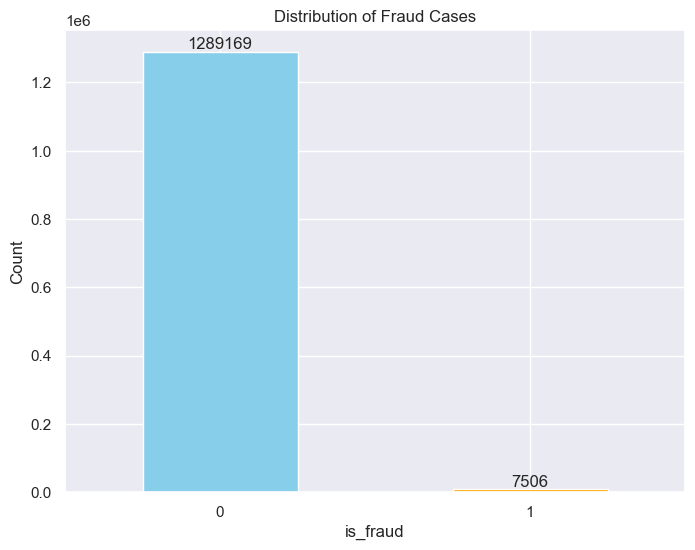

In [3]:
#fraud in dataset
fraud_counts = df['is_fraud'].value_counts()

# Plot a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['skyblue', 'orange'])
for i, count in enumerate(fraud_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.title('Distribution of Fraud Cases')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 2. Transaction Amount vs Fraud
As there are extreme outliers in transaction amount, and the 99 percentile is around \\$546, we subset the data for any transaction amounts below \\$1,000 to make the visualizations more readable. While normal transactions tend to be around \\$200 or less, we see fraudulent transactions peak around \\$300 and then at the \\$800-\\$1000 range. Transaction amount is indicative of fraud. 

In [4]:
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [5]:
np.percentile(df['amt'],99)

545.9926000000002

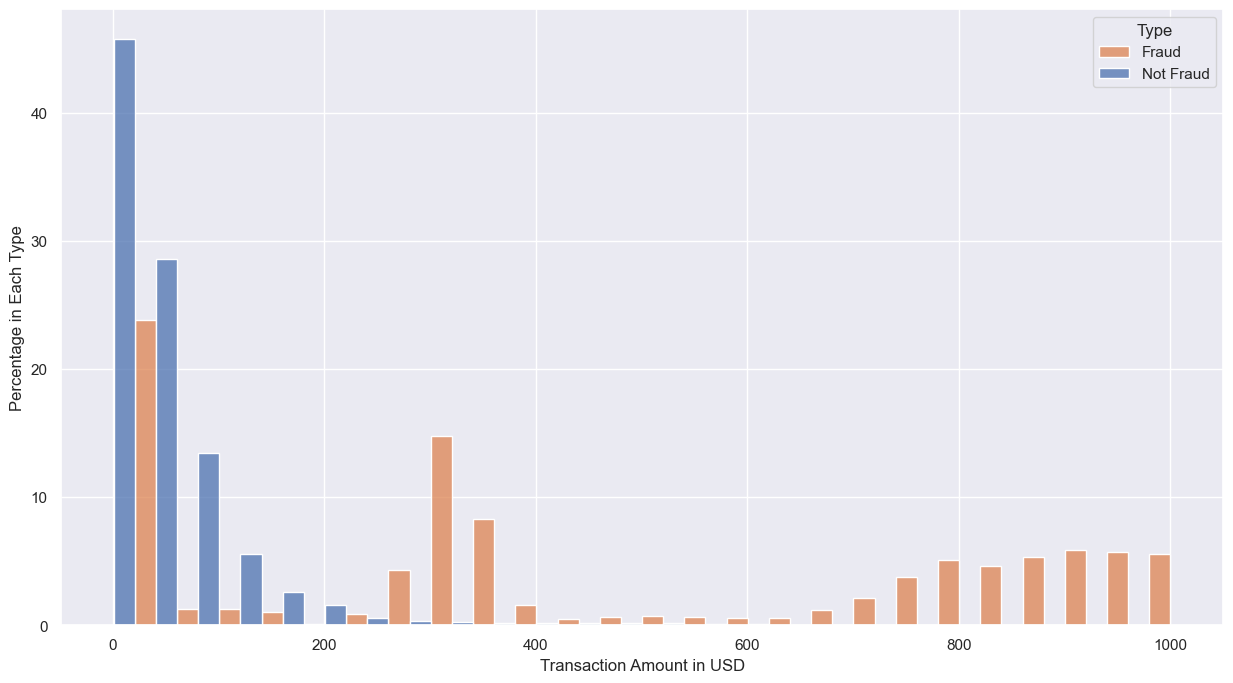

In [6]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## 3. Gender vs Fraud
We do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

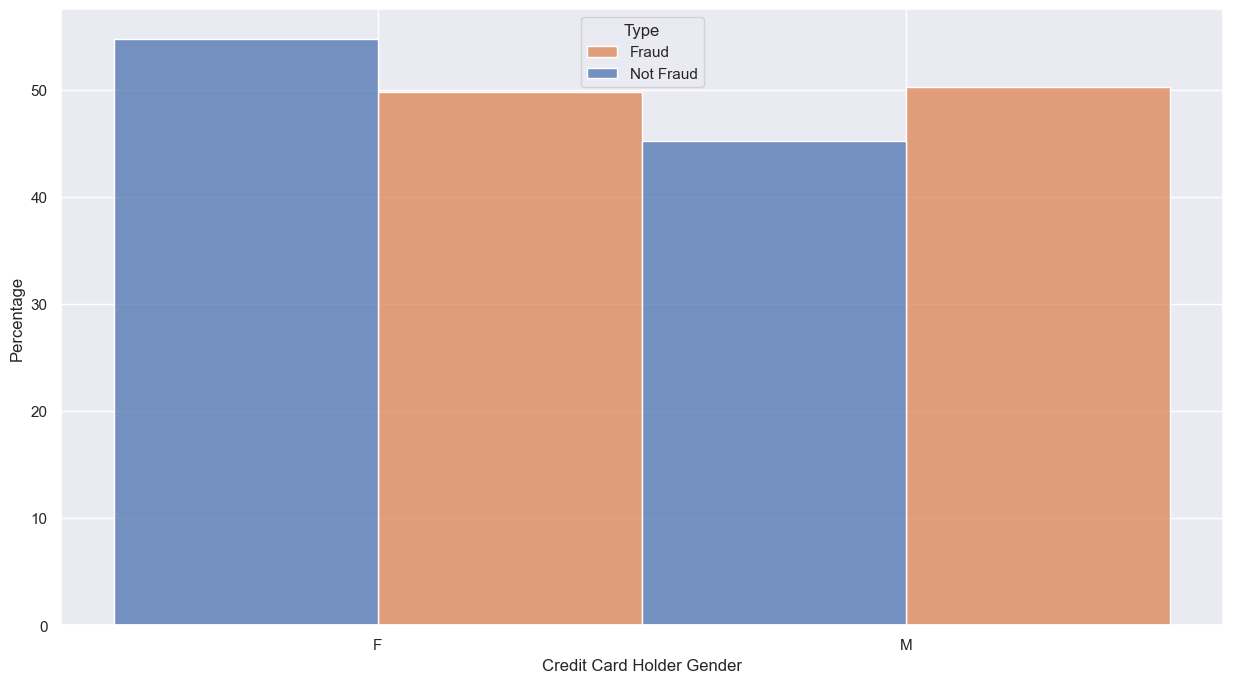

In [7]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## 4. Spending Category vs Fraud
We examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud.

Some spending categories indeed see more fraud than others. Fraud tends to happen more often in 'shopping_net', 'grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

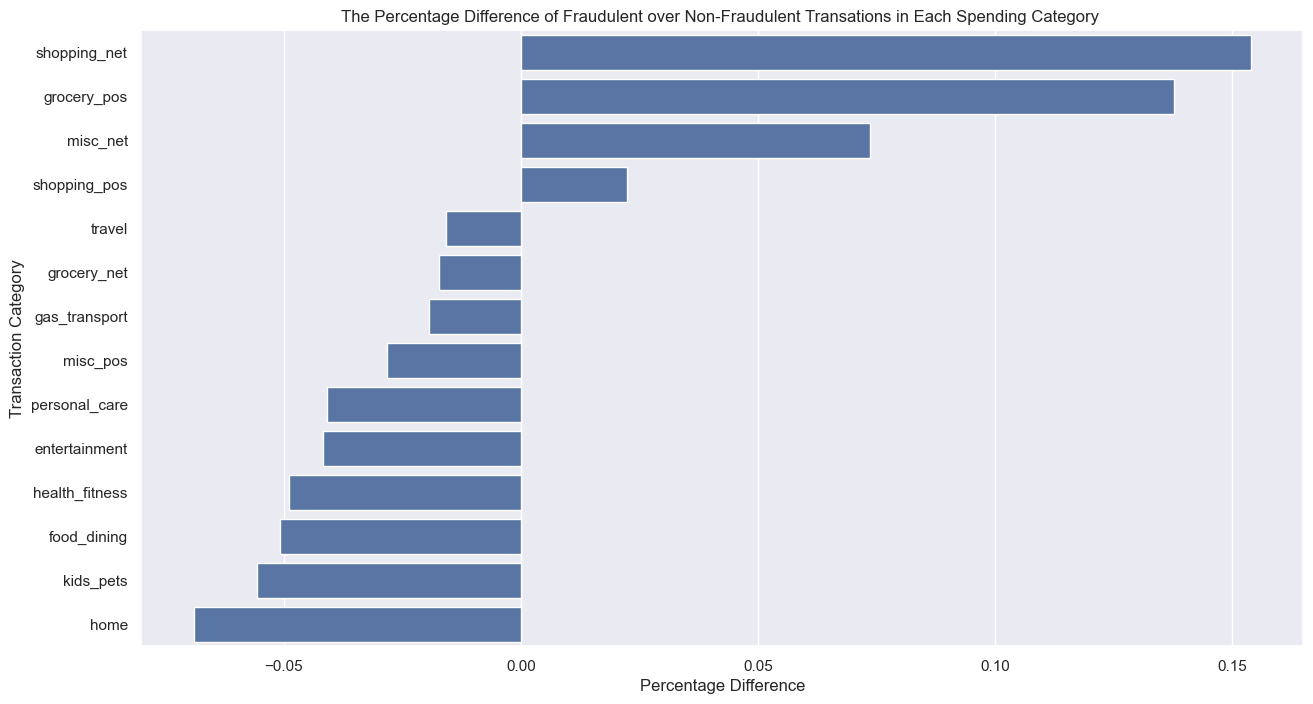

In [8]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

## 5. Age vs Fraud
Next, we want to see if older people are more prone to credit card fraud, or if its the other way around. The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud. 

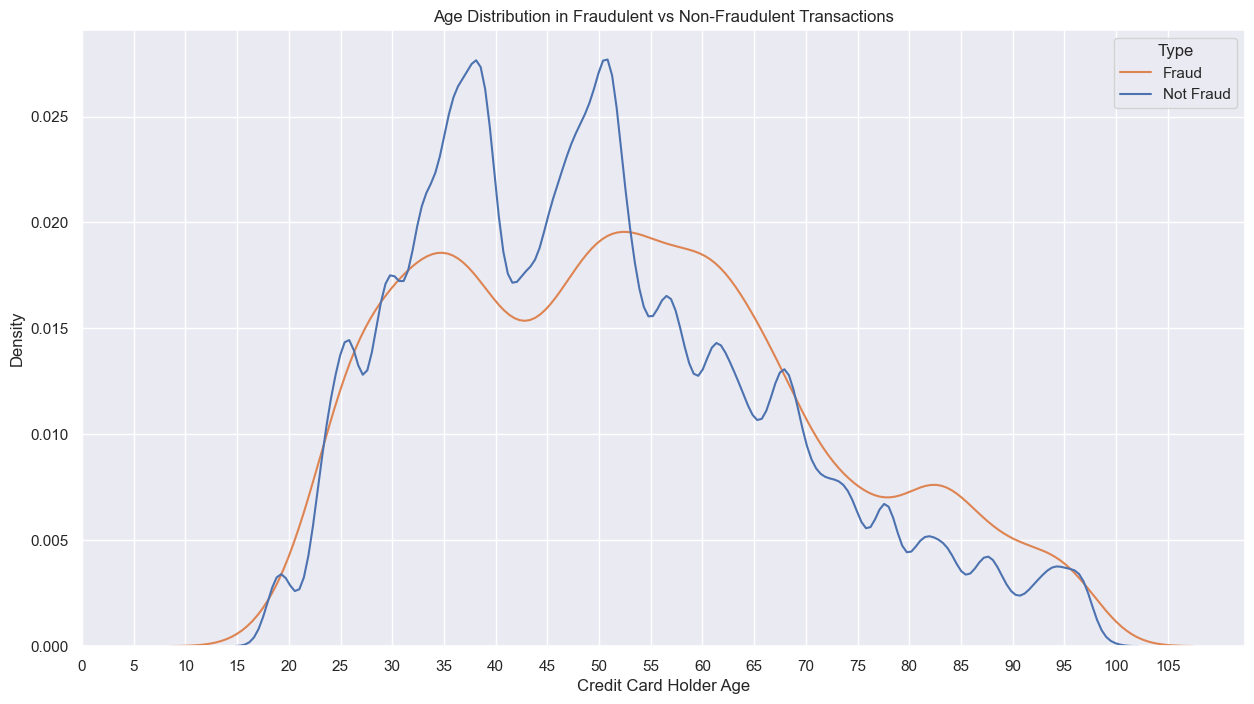

In [9]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## 6. Cyclicality of Credit Card Fraud
Here, we take a look at how fradulent transactions distribute on the temporal distribution.

#### Hourly Trend
While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep.

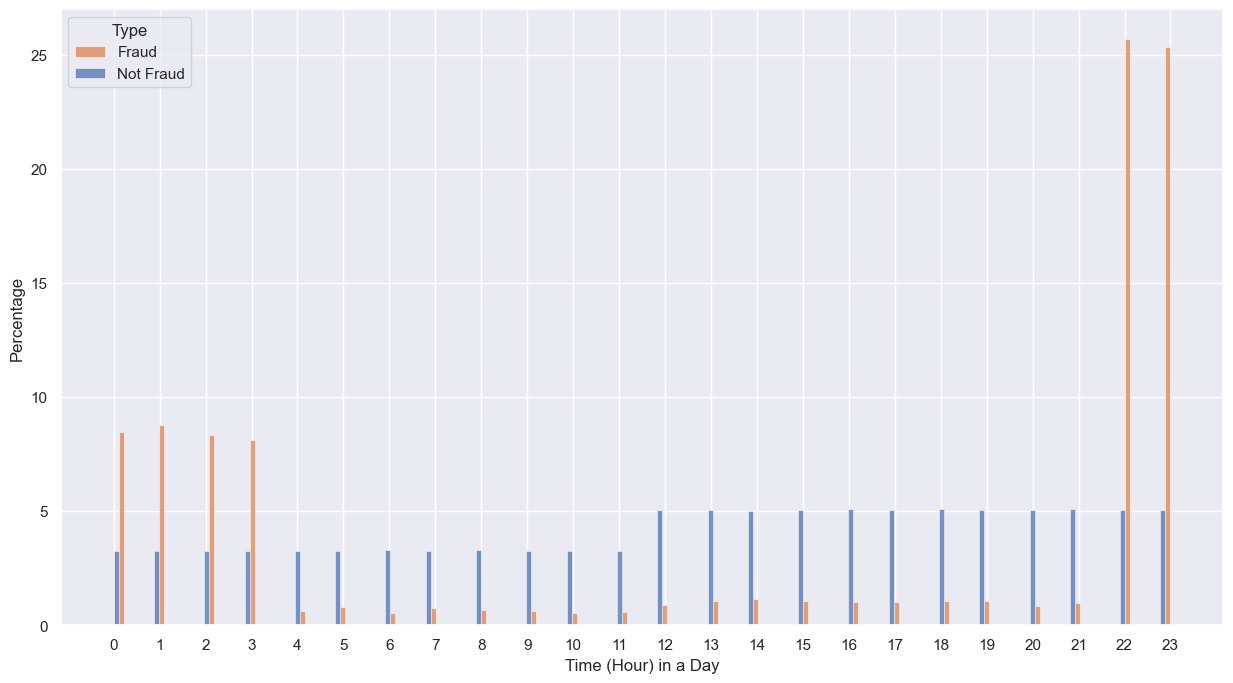

In [10]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Weekly Trend
Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

C:\Users\kenny\AppData\Local\Temp\ipykernel_5660\3206469556.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


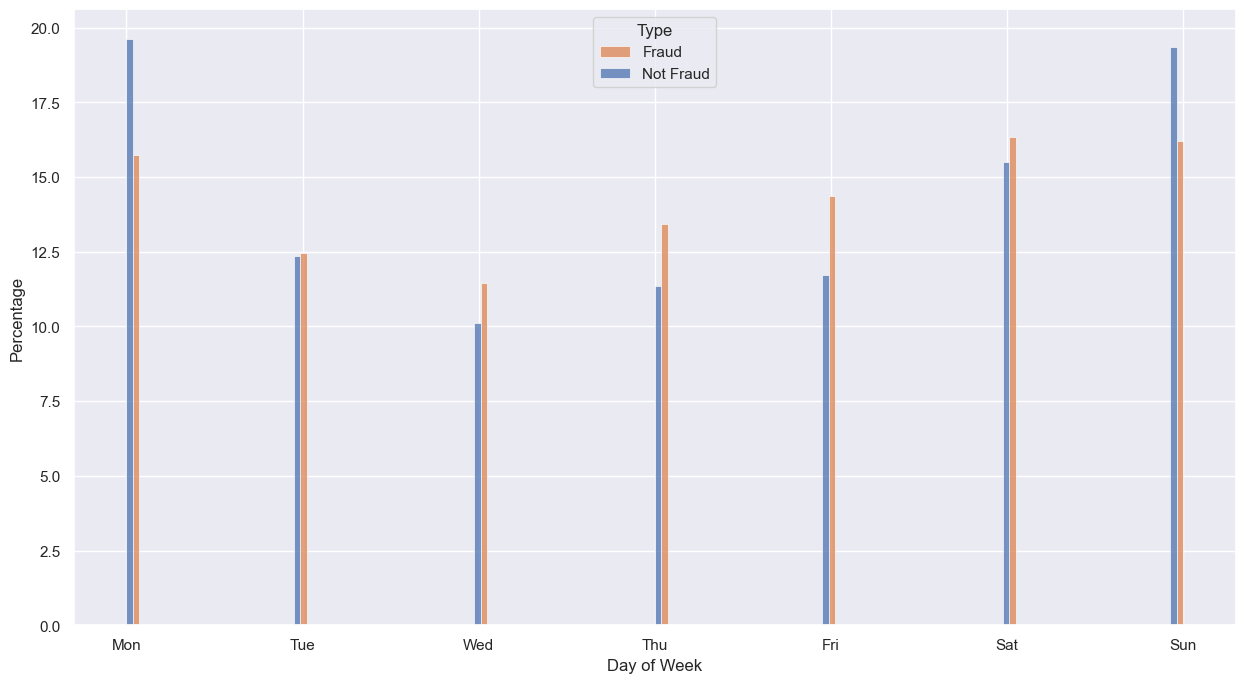

In [11]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Monthly Trend
While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

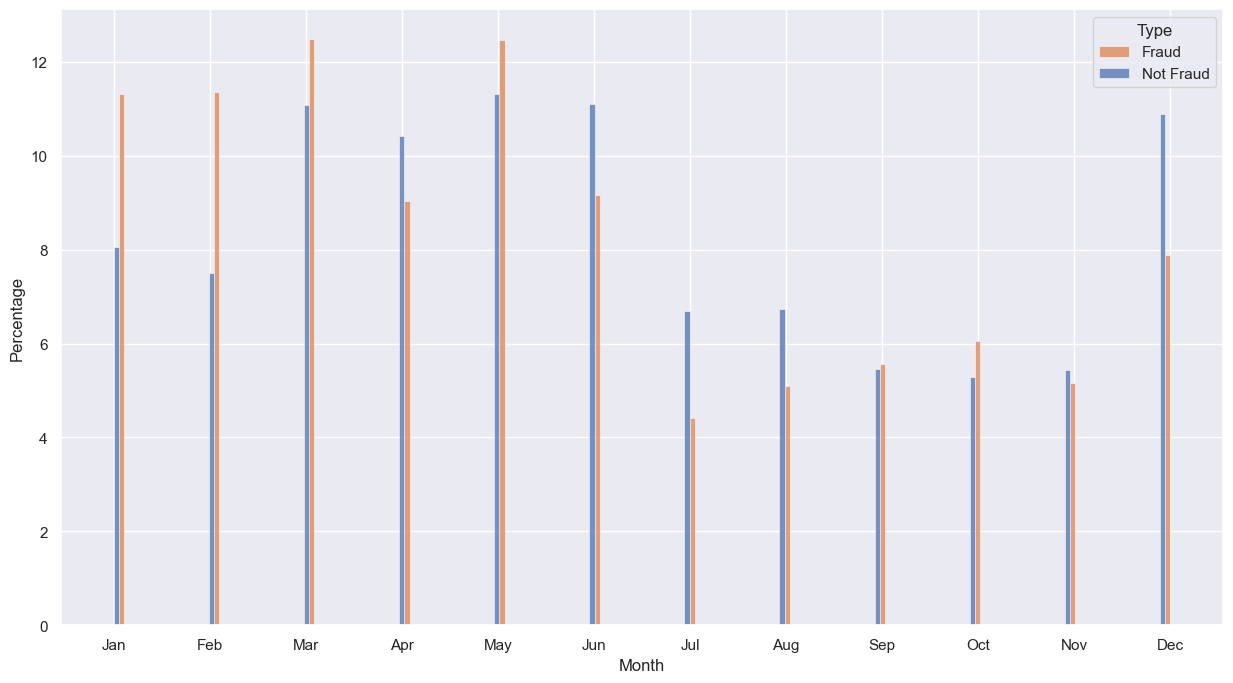

In [12]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

## 7. State vs Fraud
We will use the same methodology as in spending categories, where we calculate the difference in geographical distribution between the 2 transaction types. 

As we can see, NY and OH among others have a higher percentage of fraudulent transactions than normal ones, while TX and MT are the opposite. However, the percentage differences in those states are not very significant but a correlation does exist. 

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

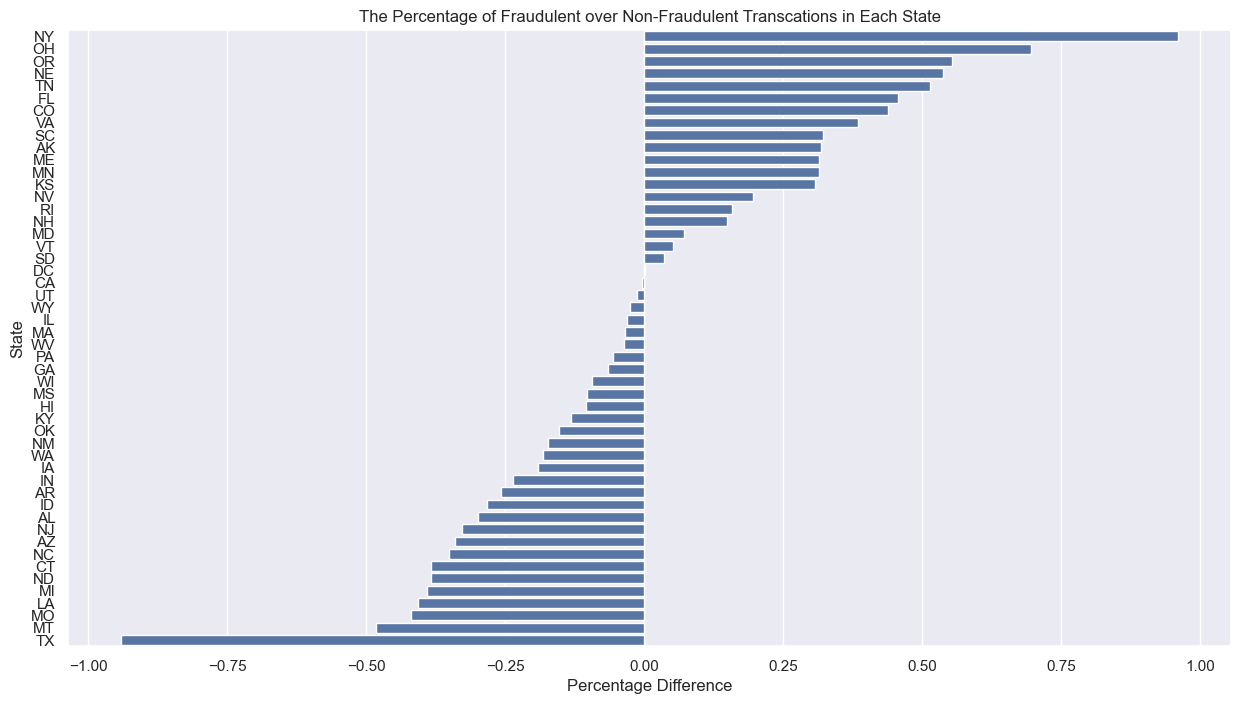

In [13]:
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

# Data Preprocessing

Here we perform 3 data preprocessing seps, Feature Selection, Resampling and Scaling of Numerical Features

## Feature Selection

From the above plots, we can see that Transaction Amount, Age, Category, Time, Location all have varying degrees of correlations with credit card fraud. This helps us choose which features we want to include in our data models. The plan is to train the models on the training data set which we have analyzed above and then use the testing dataset to evaluate the model performance.

We also try to capture the effect of varying locations, by including factors like merchant location, city population.  


Additionally, we will need to encode categorical variables like Category using OneHotEncoder, as our data models need numeric input. 

In [14]:
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
y_train=train['is_fraud']
X_train=train.drop("is_fraud", axis='columns')

#### Similarly, do this for the testset file provided.

In [15]:
test=pd.read_csv('fraudTest.csv')
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
y_test=test['is_fraud']
X_test=test.drop("is_fraud", axis='columns')

In [16]:


# Initialize OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training data
encoded_train = enc.fit_transform(X_train[['category']])

# Transform the test data
encoded_test = enc.transform(X_test[['category']])

# Create DataFrames from the encoded arrays
encoded_train_df = pd.DataFrame(encoded_train.toarray(), columns=enc.get_feature_names_out(['category']))
encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=enc.get_feature_names_out(['category']))

# Reset index before concatenation to ensure alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
X_train = pd.concat([X_train.drop(['category'], axis=1), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(['category'], axis=1), encoded_test_df], axis=1)

In [17]:
X_train

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,35,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,45,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,61,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,56,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,37,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,36.841266,-111.690765,62,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296671,51.70,21790,39.2667,-77.5101,100,38.906881,-78.246528,44,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296672,105.93,88325,32.9396,-105.8189,899,33.619513,-105.130529,56,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296673,74.90,57756,43.3526,-102.5411,1126,42.788940,-103.241160,43,12,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Resampling

In this section, we look at the impact of Oversampling and Undersampling. For oversampling (random oversampling, SMOTE), the minority class has been **increased** to have the same number of samples as the majority class, while for undersampling (random undersampling), the majority class has been **reduced** to match the number of samples in the minority class, resulting in a balanced dataset.

In [18]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE, RandomOverSampler # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.model_selection import cross_validate

from sklearn.metrics import RocCurveDisplay

import time

from sklearn.metrics import roc_auc_score

from tabulate import tabulate
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, f1_score

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score

**SMOTE**

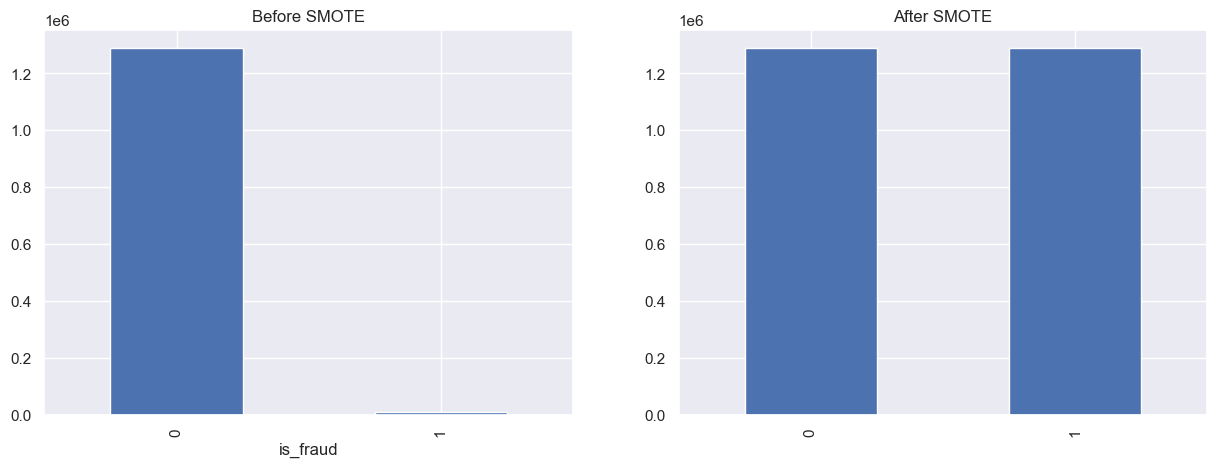

In [19]:
%matplotlib inline
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)


plt.show()

**Random Undersampling**

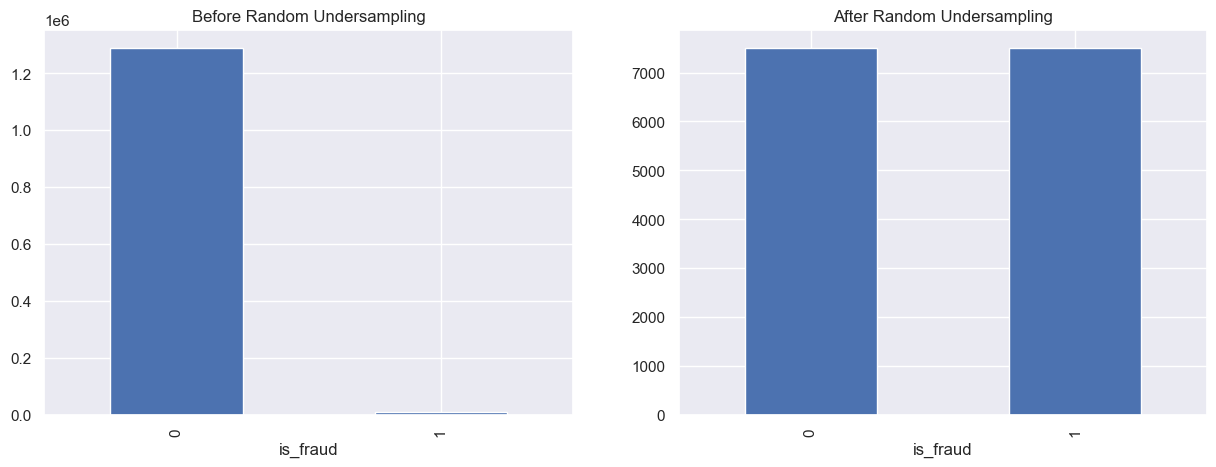

In [20]:
# Instantiate Random UnderSampler
random_undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply Random Undersampling to your data
X_train_new, y_train_new = random_undersampler.fit_resample(X_train, y_train)

# Plot the class distribution before and after Random Undersampling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Random Undersampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After Random Undersampling')
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()


**Random Oversampling**

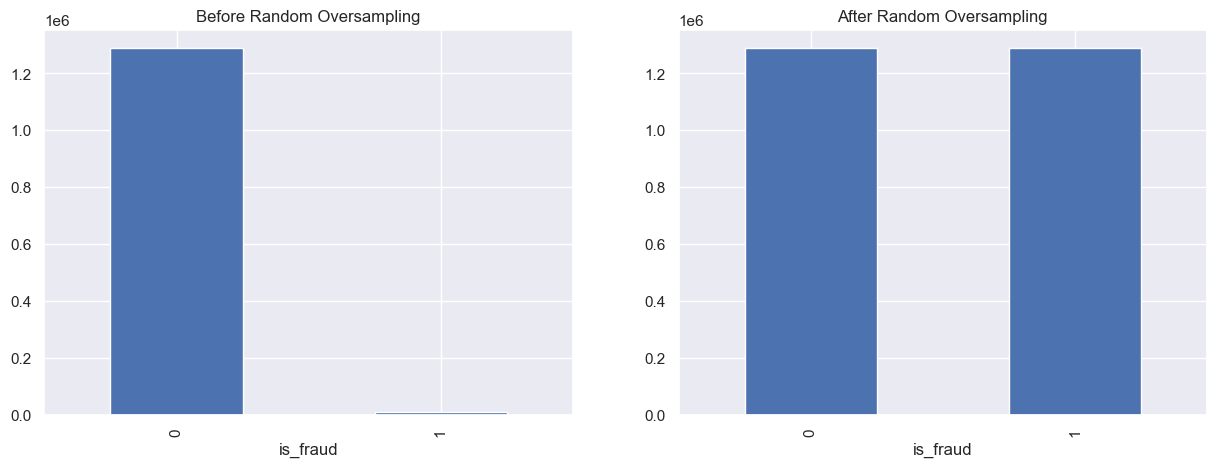

In [21]:

random_oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply Random Oversampling to your data
X_train_new, y_train_new = random_oversampler.fit_resample(X_train, y_train)

# Plot the class distribution before and after Random Oversampling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Random Oversampling')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After Random Oversampling')
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()


## Resampling Evaluation

Here we outline a comprehensive process to evaluate and compare the effectiveness of different resampling techniques for handling class imbalance in a dataset, mainly Random Undersampling/Oversampling, SMOTE, TomekLinks, and SMOTETomek.


#### Stratified sampling of dataset to create subset


Firstly, a subset of the full training dataset (X_train and y_train) is created using stratified sampling, ensuring that the subset is representative of the full dataset. This is because resampling large imbalance datasets (1M+ non-fraud, 7000+ fraud) like ours is computationally expensive, and takes a lot of time, so we decided to use a smaller dataset to run resampling experiments on.  

In [22]:
X_subset, _, y_subset, _ = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.90, random_state=42
)

#### Resampling
Secondly, each of the 5 resampling methods are applied to the subset of the training data to balance the class distribution.

In [23]:

# Define resampling methods
methods = {
    "Baseline (No resampling)" : None ,
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "Tomek Links": TomekLinks(),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Apply each resampling method
resampled_data = {}
for method_name, method in methods.items():
    if method is None:
        X_resampled, y_resampled = X_subset, y_subset
    else: 
        X_resampled, y_resampled = method.fit_resample(X_subset, y_subset)
    resampled_data[method_name] = (X_resampled, y_resampled)

#### Training set
Thirdly, for each resampled dataset, a RandomForestClassifier is instantiated and evaluated using 5-fold cross-validation. Multiple performance metrics (F1, recall, precision, accuracy) are computed for each fold and then averaged to get a sense of the model's expected performance.

In [24]:

model_performance = {}
for name, (X_res, y_res) in resampled_data.items():
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    scores = cross_validate(model, X_res, y_res, cv=5, 
                            scoring=["f1", "recall", "precision", "accuracy"])
    
    # Store average scores
    model_performance[name] = {
        "F1 Score": np.mean(scores["test_f1"]),
        "Recall": np.mean(scores["test_recall"]),
        "Precision": np.mean(scores["test_precision"]),
        "Accuracy": np.mean(scores["test_accuracy"])
    }

In [25]:
train_results_df = pd.DataFrame(model_performance).T 
print(train_results_df)

                          F1 Score    Recall  Precision  Accuracy
Baseline (No resampling)  0.712831  0.575214   0.941348  0.997332
Random Oversampling       0.999822  1.000000   0.999643  0.999822
Random Undersampling      0.924989  0.905457   0.945741  0.926753
SMOTE                     0.998849  0.998363   0.999340  0.998852
Tomek Links               0.720250  0.576627   0.960917  0.997404
SMOTETomek                0.998901  0.998399   0.999409  0.998904


#### Testing Set
Lastly, a model is retrained on each of the 5 resampled training sets. The models are then used to make predictions on a subset of the test set (X_test_subset), sampled using stratified sampling. The same performance metrics used during cross-validation are calculated for the test set predictions, providing insight into how each resampling method might perform on new, unseen data.

In [26]:


X_test_subset, _, y_test_subset, _ = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.90, random_state=42
)

test_results = {}

for method_name, (X_resampled, y_resampled) in resampled_data.items():
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test_subset)
    
    test_results[method_name] = {
        "F1 Score": f1_score(y_test_subset, y_pred),
        "Recall": recall_score(y_test_subset, y_pred),
        "Precision": precision_score(y_test_subset, y_pred),
        "Accuracy": accuracy_score(y_test_subset, y_pred)
    }  

In [27]:
test_results_df = pd.DataFrame(test_results).T
print(test_results_df)

                          F1 Score    Recall  Precision  Accuracy
Baseline (No resampling)  0.680000  0.556075   0.875000  0.997985
Random Oversampling       0.715054  0.621495   0.841772  0.998093
Random Undersampling      0.150298  0.883178   0.082138  0.961545
SMOTE                     0.708333  0.635514   0.800000  0.997985
Tomek Links               0.678063  0.556075   0.868613  0.997967
SMOTETomek                0.694960  0.612150   0.803681  0.997931


#### Evaluation
From the above results on the testing and training sets, we observe that:

* SMOTE has a relatively high recall (0.6355, 2nd highest), which is crucial in fraud detection contexts where it's important to correctly identify as many fraudulent cases as possible (true positives). 
* Random Undersampling has the highest recall (0.8832), however, it's at the expense of very low precision. Low precision means more false positives, which will then flag too many legitimate transactions as fraudulent and defeats the purpose and credibility of our fraud detection.
* The similar performance of SMOTE in both the training and testing phases suggests that it generalizes well. This is unlike Random Oversampling, where it achieved perfect recall (1.0), but performed much worse during testing (0.6215), showing a sign of overfitting.

Considering a fraud detection business where our most important goal is to identify actual fraud (recall), while at the same time maintaining credibility by not over-flagging (precision), SMOTE is our choice of resampling because it achieves a balanced performance across all key metrics.

## Scaling Numerical Features

Recognizing the varying scales of numeric features in our dataset, we implement scaling to a standard range so that the performance of machine learning algorithms improves.

In [28]:
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [29]:
# Iterate through columns and find the first non-numeric value
numeric_column = []
for column in df.columns:
    try:
        pd.to_numeric(df[column])
        numeric_column.append(column)
    except ValueError:
        continue

print(f"The numeric columns are: {numeric_column}")


The numeric columns are: ['cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'day', 'month']


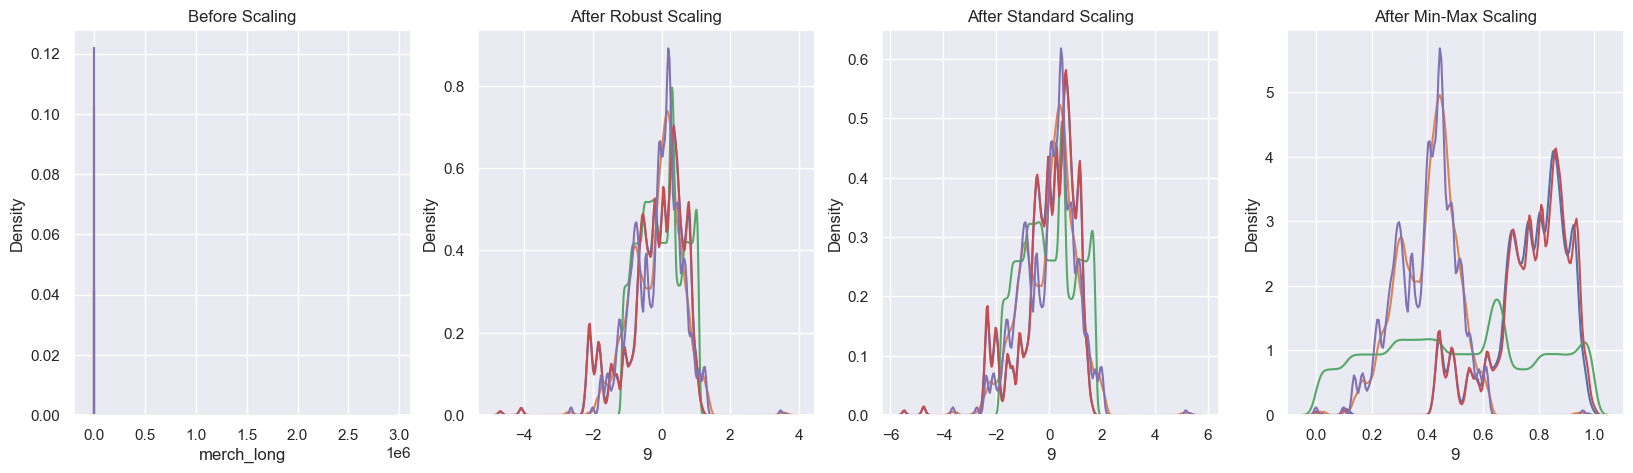

In [30]:
numeric_columns = ['cc_num', 'amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age', 'hour', 'day', 'month']
selected_df = df[numeric_columns]
scaler = RobustScaler()
robust_df = scaler.fit_transform(selected_df)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(selected_df)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(selected_df)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['merch_long'], ax = ax1)
sns.kdeplot(df['merch_lat'], ax = ax1)
sns.kdeplot(df['city_pop'], ax = ax1)
sns.kdeplot(df['long'], ax = ax1)
sns.kdeplot(df['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

From the graphs, instead of clustering within a specific range prior to scaling, the application of various scaling methods has resulted in a more even spread of the data. This observed uniformity suggests that scaling has effectively mitigated disparities in the original data distribution, contributing to a more balanced representation across the dataset.Additionally, as we have a huge amount of data, its better to normalize the dataset by using Robust Scaler which scales the data according to the quantile range.

In [31]:
feature_names = X_train.columns

**Data Preprocessing with Robust Scaler and SMOTE**

In [32]:
scaler = RobustScaler()
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

**Gaussian Naive Bayes**

In [33]:
gnb = GaussianNB()
start_time_gnb = time.time()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
end_time_gnb = time.time()
prediction_time_gnb = end_time_gnb - start_time_gnb
print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(f'Gaussian Naive Bayes time: {prediction_time_gnb:.4f} seconds')
accuracy_gnb = accuracy_score(y_test, gnb_pred)
recall_gnb = recall_score(y_test, gnb_pred)
f1_gnb = f1_score(y_test, gnb_pred)
precision_gnb = precision_score(y_test,gnb_pred)
print(f'Accuracy: {accuracy_gnb}')
print(f'Recall: {recall_gnb}')
print(f'F1 Score: {f1_gnb}')
print(f'Precision: {precision_gnb}')

[[381161 172413]
 [   655   1490]]


Gaussian Naive Bayes time: 1.5600 seconds
Accuracy: 0.6885692229346126
Recall: 0.6946386946386947
F1 Score: 0.016927201672271196
Precision: 0.008567994801699797


In [34]:
y_train_prob_gnb = gnb.predict(X_train)
y_test_prob_gnb = gnb.predict(X_test)

# Calculate AUC for train set
auc_train_gnb = roc_auc_score(y_train, y_train_prob_gnb)
print(f'AUC for Train Set for Gaussian Naive Bayes: {auc_train_gnb:.4f}')

# Calculate AUC for test set
auc_test_gnb = roc_auc_score(y_test, y_test_prob_gnb)
print(f'AUC for Test Set for Gaussian Naive Bayes: {auc_test_gnb:.4f}')

AUC for Train Set for Gaussian Naive Bayes: 0.7200
AUC for Test Set for Gaussian Naive Bayes: 0.6916


**Decision Tree**

In [35]:
dtree = DecisionTreeClassifier(random_state = 42)
start_time_dtree = time.time()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
end_time_dtree = time.time()
prediction_time_dtree = end_time_dtree - start_time_dtree
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(f'Decision Tree time: {prediction_time_dtree:.4f} seconds')

accuracy_dtree = accuracy_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)
f1_dtree = f1_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test,dtree_pred)

print(f'Accuracy: {accuracy_dtree}')
print(f'Recall: {recall_dtree}')
print(f'F1 Score: {f1_dtree}')
print(f'Precision: {precision_dtree}')

[[552764    810]
 [   486   1659]]


Decision Tree time: 48.8910 seconds
Accuracy: 0.997667886107907
Recall: 0.7734265734265734
F1 Score: 0.719115734720416
Precision: 0.6719319562575942


In [36]:
y_train_prob = dtree.predict(X_train)
y_test_prob = dtree.predict(X_test)

# Calculate AUC for train set
auc_train_dtree = roc_auc_score(y_train, y_train_prob)
print(f'AUC for Train Set for Decision Tree: {auc_train_dtree:.4f}')

# Calculate AUC for test set
auc_test_dtree = roc_auc_score(y_test, y_test_prob)
print(f'AUC for Test Set for Decision Tree: {auc_test_dtree:.4f}')

AUC for Train Set for Decision Tree: 1.0000
AUC for Test Set for Decision Tree: 0.8860


**Random Forest**

In [37]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state = 42)
start_time_rfc = time.time()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
end_time_rfc = time.time()
prediction_time_rfc = end_time_rfc - start_time_rfc
print(confusion_matrix(y_test,rfc_pred))
print('\n')

print(f'Random Forest time: {prediction_time_rfc:.4f} seconds')

accuracy_rfc = accuracy_score(y_test, rfc_pred)
recall_rfc = recall_score(y_test, rfc_pred)
f1_rfc = f1_score(y_test, rfc_pred)
precision_rfc = precision_score(y_test, rfc_pred)

print(f'Accuracy: {accuracy_rfc}')
print(f'Recall: {recall_rfc}')
print(f'F1 Score: {f1_rfc}')
print(f'Precision: {precision_rfc}')

[[553299    275]
 [   532   1613]]


Random Forest time: 246.6913 seconds
Accuracy: 0.9985478272292292
Recall: 0.751981351981352
F1 Score: 0.799900818249442
Precision: 0.854343220338983


In [38]:
y_train_prob_rfc = rfc.predict(X_train)
y_test_prob_rfc = rfc.predict(X_test)

# Calculate AUC for train set
auc_train_rfc = roc_auc_score(y_train, y_train_prob_rfc)
print(f'AUC for Train Set for Random Forest: {auc_train_rfc:.4f}')

# Calculate AUC for test set
auc_test_rfc = roc_auc_score(y_test, y_test_prob_rfc)
print(f'AUC for Test Set for Random Forest: {auc_test_rfc:.4f}')

AUC for Train Set for Random Forest: 1.0000
AUC for Test Set for Random Forest: 0.8757


**AdaBoost**

In [39]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state = 42),n_estimators=100, random_state = 42)
start_time_ada = time.time()
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)
end_time_ada = time.time()
prediction_time_ada = end_time_ada - start_time_ada
print(confusion_matrix(y_test,adabc_pred))
print('\n')

print(f'AdaBoost time: {prediction_time_ada:.4f} seconds')

accuracy_ada = accuracy_score(y_test, adabc_pred)
recall_ada = recall_score(y_test, adabc_pred)
f1_ada = f1_score(y_test, adabc_pred)
precision_ada = precision_score(y_test,adabc_pred)

print(f'Accuracy: {accuracy_ada}')
print(f'Recall: {recall_ada}')
print(f'F1 Score: {f1_ada}')
print(f'Precision: {precision_ada}')

[[545265   8309]
 [   433   1712]]


AdaBoost time: 694.0741 seconds
Accuracy: 0.9842690280519472
Recall: 0.7981351981351982
F1 Score: 0.28144007890843337
Precision: 0.17084123340983934


In [40]:
y_train_prob_ada = adabc.predict(X_train)
y_test_prob_ada = adabc.predict(X_test)

# Calculate AUC for train set
auc_train_ada = roc_auc_score(y_train, y_train_prob_ada)
print(f'AUC for Train Set for AdaBoost: {auc_train_ada:.4f}')

# Calculate AUC for test set
auc_test_ada = roc_auc_score(y_test, y_test_prob_ada)
print(f'AUC for Test Set for AdaBoost: {auc_test_ada:.4f}')

AUC for Train Set for AdaBoost: 0.9805
AUC for Test Set for AdaBoost: 0.8916


**Gradient Boosting Model**

In [41]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set hyperparameters for the model
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Create a LightGBM classifier with predefined hyperparameters
lgb_classifier = lgb.LGBMClassifier(**params, n_jobs=-1, random_state=42)

start_time_lgb = time.time()

# Fit the model
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_classifier.predict(X_test)

end_time_lgb = time.time()
prediction_lgb = end_time_lgb - start_time_lgb

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
print("\n")
print(confusion_matrix(y_test,y_pred_lgb))
print('\n')
print(f'LGBoost time: {prediction_lgb:.4f} seconds')
print(f'Accuracy: {accuracy_lgb}')
print(f'Recall: {recall_lgb}')
print(f'F1 Score: {f1_lgb}')
print(f'Precision: {precision_lgb}')



[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 1289169, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5478
[LightGBM] [Info] Number of data points in the train set: 2578338, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


[[550120   3454]
 [   261   1884]]


LGBoost time: 13.6576 seconds
Accuracy: 0.993314966736786
Recall: 0.878321678321

In [42]:
y_train_prob_lgb = lgb_classifier.predict(X_train)
y_test_prob_lgb = lgb_classifier.predict(X_test)
print("\n")
# Calculate AUC for train set
auc_train_lgb = roc_auc_score(y_train, y_train_prob_lgb)
print(f'AUC for Train Set for Gradient Boosting: {auc_train_lgb:.4f}')

# Calculate AUC for test set
auc_test_lgb = roc_auc_score(y_test, y_test_prob_lgb)
print(f'AUC for Test Set for Gradient Boosting: {auc_test_lgb:.4f}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


AUC for Train Set for Gradient Boosting: 0.9918
AUC for Test Set for Gradient Boosting: 0.9360


# Evaluation

**Feature Importance**

Here we find the generally most important features, among the 4 models. (Gaussian NB excluded as it does not offer an intrinsic method to evaluate feature importances.)

In [43]:
feature_importances_dtree = dtree.feature_importances_
feature_importances_rfc = rfc.feature_importances_
feature_importances_ada = adabc.feature_importances_
feature_importance_lgb = lgb_classifier.feature_importances_

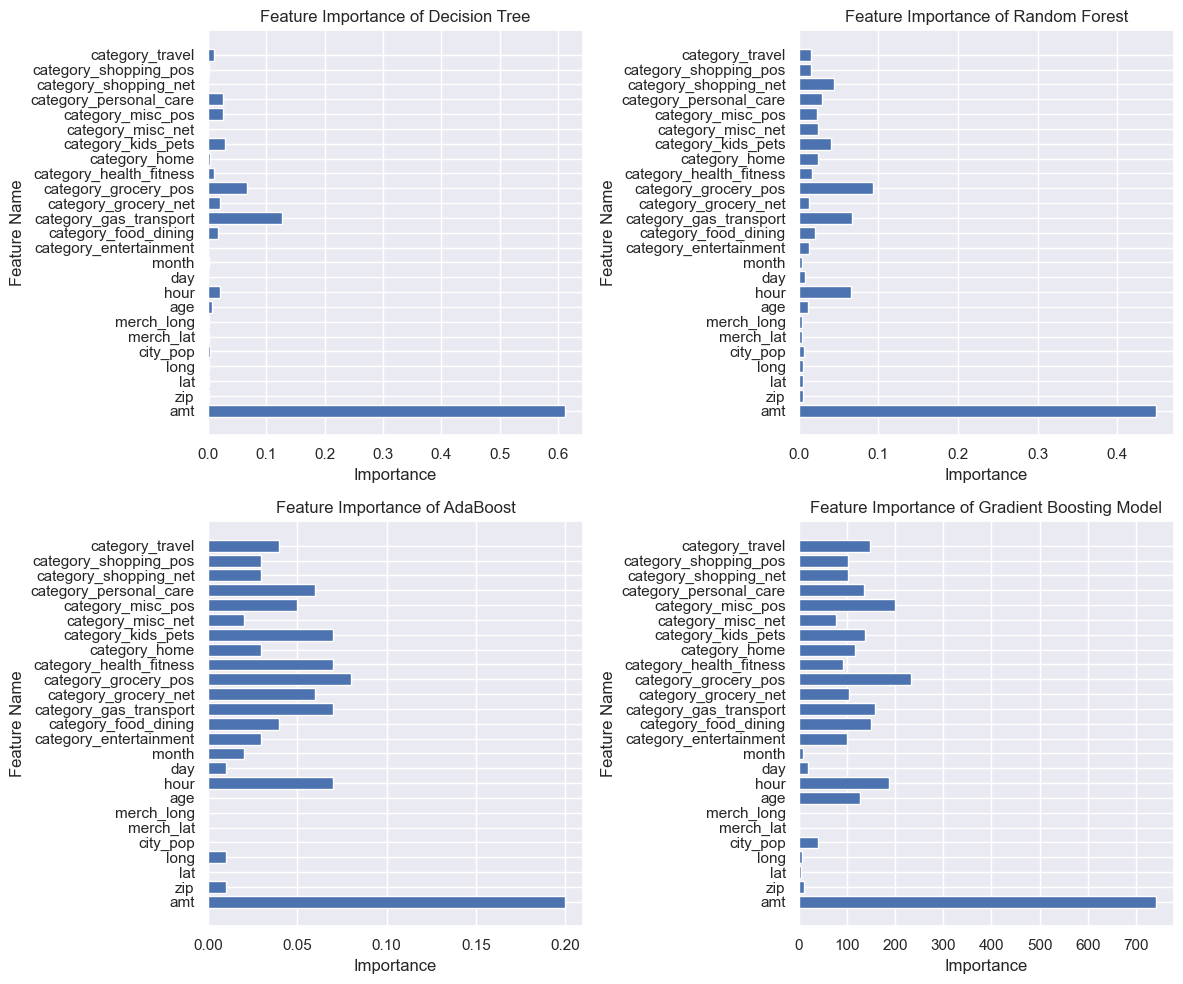

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


# Plot the second feature importance
axes[0, 0].barh(range(len(feature_importances_dtree)), feature_importances_dtree)
axes[0, 0].set_yticks(range(len(feature_importances_dtree)))
axes[0, 0].set_yticklabels(feature_names)
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_ylabel('Feature Name')
axes[0, 0].set_title('Feature Importance of Decision Tree')

# Plot the third feature importance
axes[0, 1].barh(range(len(feature_importances_rfc)), feature_importances_rfc)
axes[0, 1].set_yticks(range(len(feature_importances_rfc)))
axes[0, 1].set_yticklabels(feature_names)
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_ylabel('Feature Name')
axes[0, 1].set_title('Feature Importance of Random Forest')

# Plot the fourth feature importance
axes[1, 0].barh(range(len(feature_importances_ada)), feature_importances_ada)
axes[1, 0].set_yticks(range(len(feature_importances_ada)))
axes[1, 0].set_yticklabels(feature_names)
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_ylabel('Feature Name')
axes[1, 0].set_title('Feature Importance of AdaBoost')

# Plot the first feature importance
axes[1, 1].barh(range(len(feature_importance_lgb)), feature_importance_lgb)
axes[1, 1].set_yticks(range(len(feature_importance_lgb)))
axes[1, 1].set_yticklabels(feature_names)
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_ylabel('Feature Name')
axes[1, 1].set_title('Feature Importance of Gradient Boosting Model')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
# Top 3 features for Decision Tree
sorted_indices_dtree = np.argsort(feature_importances_dtree)[::-1]
top_features_dtree = sorted_indices_dtree[:3]
top_features_dtree_names = [feature_names[i] for i in top_features_dtree]

# Top 3 features for Random Forest
sorted_indices_rfc = np.argsort(feature_importances_rfc)[::-1]
top_features_rfc = sorted_indices_rfc[:3]
top_features_rfc_names = [feature_names[i] for i in top_features_rfc]

# Top 3 features for AdaBoost
sorted_indices_ada = np.argsort(feature_importances_ada)[::-1]
top_features_ada = sorted_indices_ada[:3]
top_features_ada_names = [feature_names[i] for i in top_features_ada]

# Top 3 features for Gradient Boost
sorted_indices_lgb = np.argsort(feature_importance_lgb)[::-1]
top_features_lgb = sorted_indices_lgb[:3]
top_features_lgb_names = [feature_names[i] for i in top_features_lgb]

In [46]:
# Assuming you have feature importance results for different models
feature_importance_results = [
    {'Model': 'Decision Tree', 'Features': ', '.join(top_features_dtree_names)},
    {'Model': 'Random Forest', 'Features': ', '.join(top_features_rfc_names)},
    {'Model': 'AdaBoost', 'Features': ', '.join(top_features_ada_names)},
    {'Model': 'Gradient Boosting', 'Features': ', '.join(top_features_lgb_names)},
]

# Create a text-based table for feature importance
feature_importance_table = tabulate(feature_importance_results, headers='keys', tablefmt='fancy_grid')

# Display the table
print("Feature Importance:")
print(feature_importance_table)


Feature Importance:
╒═══════════════════╤═══════════════════════════════════════════════════╕
│ Model             │ Features                                          │
╞═══════════════════╪═══════════════════════════════════════════════════╡
│ Decision Tree     │ amt, category_gas_transport, category_grocery_pos │
├───────────────────┼───────────────────────────────────────────────────┤
│ Random Forest     │ amt, category_grocery_pos, category_gas_transport │
├───────────────────┼───────────────────────────────────────────────────┤
│ AdaBoost          │ amt, category_grocery_pos, hour                   │
├───────────────────┼───────────────────────────────────────────────────┤
│ Gradient Boosting │ amt, category_grocery_pos, category_misc_pos      │
╘═══════════════════╧═══════════════════════════════════════════════════╛


Generally, the top important features are `amt`, `category_grocery_pos` as they appear in all 4 models.

#### ROC Curve
The ROC Curve shows that Gradient Boosting has the best AUC, followed by AdaBoost, Decision Tree and Random Forest, and worst of all Gaussian NB.

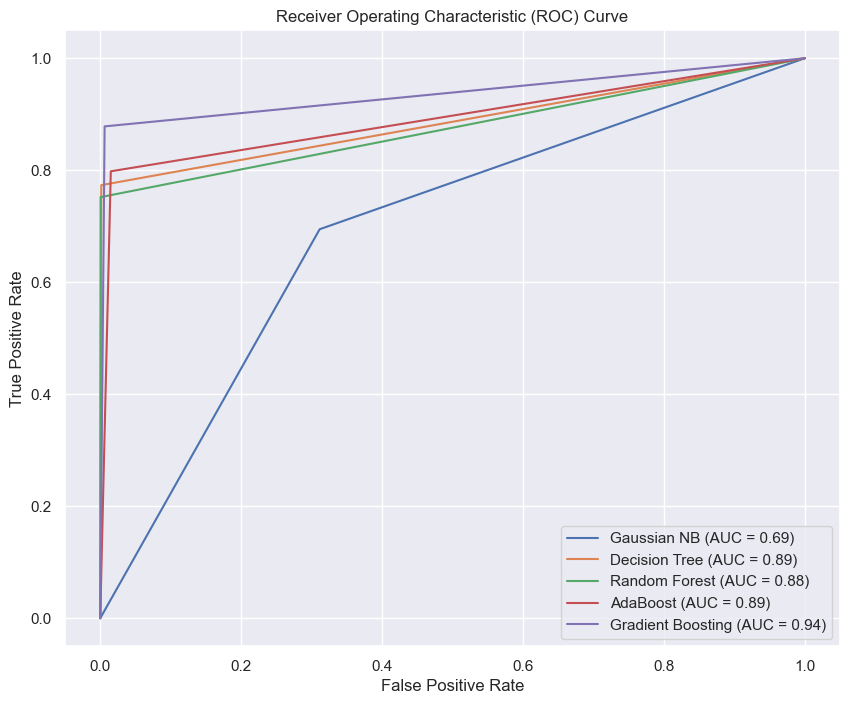

In [47]:
# Assuming you have gnb_pred, dtree_pred, rfc_pred, adabc_pred, and y_test

# Create a figure and axis for the ROC curve
fig, ax = plt.subplots(figsize=(10, 8))

# Plot ROC curve for Gaussian Naive Bayes
roc_display_gnb = RocCurveDisplay.from_predictions(y_test, gnb_pred, ax=ax, label=f'Gaussian NB (AUC = {roc_auc_score(y_test, gnb_pred):.2f})')

# Plot ROC curve for Decision Tree
roc_display_dtree = RocCurveDisplay.from_predictions(y_test, dtree_pred, ax=ax, label=f'Decision Tree (AUC = {roc_auc_score(y_test, dtree_pred):.2f})')

# Plot ROC curve for Random Forest
roc_display_rfc = RocCurveDisplay.from_predictions(y_test, rfc_pred, ax=ax, label=f'Random Forest (AUC = {roc_auc_score(y_test, rfc_pred):.2f})')

# Plot ROC curve for AdaBoost
roc_display_adabc = RocCurveDisplay.from_predictions(y_test, adabc_pred, ax=ax, label=f'AdaBoost (AUC = {roc_auc_score(y_test, adabc_pred):.2f})')

roc_display_lgb = RocCurveDisplay.from_predictions(y_test, y_pred_lgb , ax=ax, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_pred_lgb):.2f})')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


**Precision-Recall Curve**

In the provided plot, the Random Forest model has the highest AP value (0.643), suggesting it outperforms the other models in terms of the precision-recall trade-off for this particular dataset. The Gaussian Naive Bayes model has the lowest AP value (0.007), indicating it has the worst performance among the models displayed.

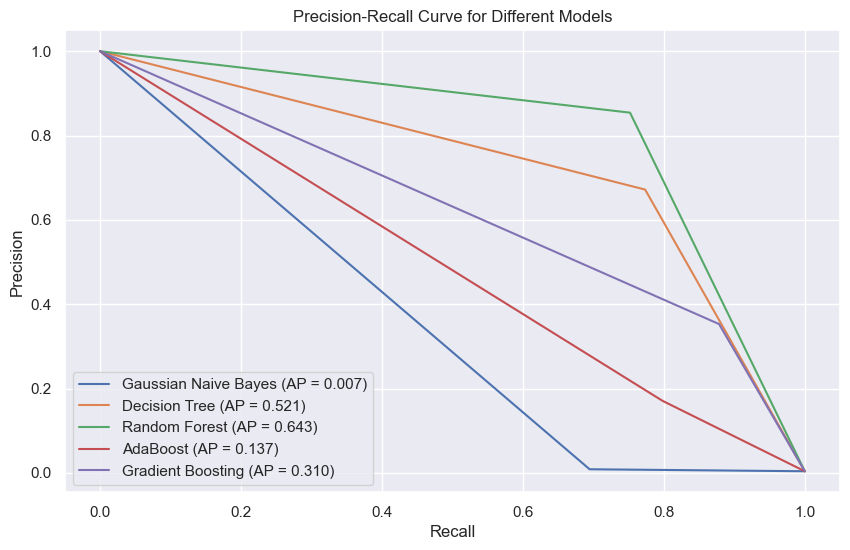

In [48]:
predicted_probs = [gnb_pred, dtree_pred, rfc_pred, adabc_pred, y_pred_lgb]

model_names = ['Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']

# Plot precision-recall curve for each model
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    precision, recall, _ = precision_recall_curve(y_test, predicted_probs[i])
    average_precision = average_precision_score(y_test, predicted_probs[i])
    
    plt.plot(recall, precision, label=f'{model_names[i]} (AP = {average_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Models')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Evaluation Table**

In [49]:
# Assuming you have metrics results for different models
results = [
    {'Model': 'Gaussian Naive Bayes', 'Accuracy': accuracy_gnb,  'Precision': precision_gnb, 'Recall': recall_gnb,'F1': f1_gnb, 'ROC AUC Train': auc_train_gnb, 'ROC AUC Test': auc_test_gnb,'Time(s)':prediction_time_gnb},
    {'Model': 'Decision Tree', 'Accuracy': accuracy_dtree,  'Precision': precision_dtree, 'Recall': recall_dtree,'F1': f1_dtree, 'ROC AUC Train': auc_train_dtree, 'ROC AUC Test': auc_test_dtree,'Time(s)':prediction_time_dtree},
    {'Model': 'Random Forest', 'Accuracy': accuracy_rfc, 'Precision': precision_rfc, 'Recall': recall_rfc,  'F1': f1_rfc, 'ROC AUC Train': auc_train_rfc, 'ROC AUC Test': auc_test_rfc,'Time(s)':prediction_time_rfc},
    {'Model': 'AdaBoost', 'Accuracy': accuracy_ada,  'Precision': precision_ada, 'Recall': recall_ada,  'F1': f1_ada, 'ROC AUC Train': auc_train_ada, 'ROC AUC Test':auc_test_ada,'Time(s)':prediction_time_ada},
    {'Model': 'Gradient Boosting', 'Accuracy': accuracy_lgb,  'Precision': precision_lgb, 'Recall': recall_lgb,'F1': f1_lgb, 'ROC AUC Train': auc_train_lgb, 'ROC AUC Test': auc_test_lgb,'Time(s)' :prediction_lgb},
]
for result in results:
    for key, value in result.items():
        if isinstance(value, (float, int)):
            result[key] = round(value, 4)

# Create a text-based table
table = tabulate(results, headers='keys', tablefmt='fancy_grid')

# Display the table
print(table)


╒══════════════════════╤════════════╤═════════════╤══════════╤════════╤═════════════════╤════════════════╤═══════════╕
│ Model                │   Accuracy │   Precision │   Recall │     F1 │   ROC AUC Train │   ROC AUC Test │   Time(s) │
╞══════════════════════╪════════════╪═════════════╪══════════╪════════╪═════════════════╪════════════════╪═══════════╡
│ Gaussian Naive Bayes │     0.6886 │      0.0086 │   0.6946 │ 0.0169 │          0.72   │         0.6916 │    1.56   │
├──────────────────────┼────────────┼─────────────┼──────────┼────────┼─────────────────┼────────────────┼───────────┤
│ Decision Tree        │     0.9977 │      0.6719 │   0.7734 │ 0.7191 │          1      │         0.886  │   48.891  │
├──────────────────────┼────────────┼─────────────┼──────────┼────────┼─────────────────┼────────────────┼───────────┤
│ Random Forest        │     0.9985 │      0.8543 │   0.752  │ 0.7999 │          1      │         0.8757 │  246.691  │
├──────────────────────┼────────────┼───────────

To identify the optimal model, we evaluate two key criteria: recall, emphasizing the need to minimize false negatives, precision, to minimize false positives, and operational efficiency to minimize disruptions in real-world scenarios.

Considering recall, Gradient Boosting emerges with the highest recall value at 0.8783, followed by AdaBoost at 0.7981, and Decision Tree at 0.7734, with Random Forest and Gaussian Naive Bayes trailing at 0.752 and 0.6946, respectively.

Considering precision, Random Forest has the highest precision at 0.8518, followed by Decision Tree, Gradient Boosting, AdaBoost and Gaussian Naive Bayes.

Considering runtime, Gaussian Naive Bayes consumes the least time at 1.56 seconds, followed by Decision Tree at 48.891 seconds, Random Forest at 246.691 seconds, Gradient Boosting at 13.6576 seconds, and AdaBoost at 694.074 seconds.

Balancing recall, precision and operational considerations, the Random Forest model emerges as a compelling choice. Its strikes a balance between recall and precision, and with a decent computational time, it is an efficient solution for robust fraud detection while minimizing disruptions in real-world scenarios.

# Conclusion

In addressing the challenges posed by our unbalanced dataset, we have made the strategic decision to apply the Systhetic Minority Over-Sampling Technique (SMOTE) to the entire dataset. Given the inherent imbalance between fradulent and non-fraudulent cases, SMOTE, allows us to generate synthetic instances of the minority class, effectively balancing the class distribution.

Simultaneously, our recommendation is to implement the Random Forest model based on the results above, a recall of 0.752, a precision of 0.8543, and a run time of 246.691s, with a relatively high F1 score of 0.7999. Recognizing the operational needs of a company, a high recall score is essential for robust fraud detection, while precision maintains credibility by not over-flagging, and the Random Forest's decent computational time minimizes disruptions, aligning with the imperative to operate efficiently within a limited timeframe. Together, these choices reaffirm our dedication to creating a fraud detection model that is both effective and practical for real-world applications.